In [1]:
!conda install seaborn --yes

Solving environment: done

# All requested packages already installed.



In [2]:
from keras import backend as K
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras.callbacks import TensorBoard
from keras import metrics
import seaborn as sns

from scipy import stats
from sklearn.decomposition import PCA
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches



Using TensorFlow backend.


In [3]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# PCA (linear autoencoders)

In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [5]:
# this is the size of our encoded representations
encoding_dim = 2

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='linear')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='linear')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

W1013 12:03:25.314712 140735847728000 deprecation_wrapper.py:119] From /anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1013 12:03:25.329550 140735847728000 deprecation_wrapper.py:119] From /anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1013 12:03:25.333298 140735847728000 deprecation_wrapper.py:119] From /anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1013 12:03:25.361234 140735847728000 deprecation_wrapper.py:119] From /anaconda3/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [6]:
%%time
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder/linear-2d')])

W1013 12:03:26.530050 140735847728000 deprecation_wrapper.py:119] From /anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W1013 12:03:26.535448 140735847728000 deprecation_wrapper.py:119] From /anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.

W1013 12:03:26.675005 140735847728000 deprecation_wrapper.py:119] From /anaconda3/lib/python3.6/site-packages/keras/callbacks.py:850: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.

W1013 12:03:26.675845 140735847728000 deprecation_wrapper.py:119] From /anaconda3/lib/python3.6/site-packages/keras/callbacks.py:853: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 9us/step - loss: 0.0789 - val_loss: 0.0635
Epoch 2/50
60000/60000 [==============================] - 0s 8us/step - loss: 0.0631 - val_loss: 0.0625
Epoch 3/50
60000/60000 [==============================] - 0s 7us/step - loss: 0.0616 - val_loss: 0.0604
Epoch 4/50
60000/60000 [==============================] - 0s 7us/step - loss: 0.0596 - val_loss: 0.0587
Epoch 5/50
60000/60000 [==============================] - 0s 8us/step - loss: 0.0586 - val_loss: 0.0581
Epoch 6/50
60000/60000 [==============================] - 0s 7us/step - loss: 0.0582 - val_loss: 0.0579
Epoch 7/50
60000/60000 [==============================] - 0s 8us/step - loss: 0.0581 - val_loss: 0.0577
Epoch 8/50
60000/60000 [==============================] - 0s 7us/step - loss: 0.0579 - val_loss: 0.0577
Epoch 9/50
60000/60000 [==============================] - 0s 7us/step - loss: 0.0579 - val_loss: 0.0576
Epoch 10/50
60

In [7]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [8]:
pca_model = PCA(2)
pca_model.fit(x_train)
pca_encoded_imgs = pca_model.transform(x_test)

In [9]:
pca_decoded_imgs = np.dot(pca_encoded_imgs, pca_model.components_) + pca_model.mean_

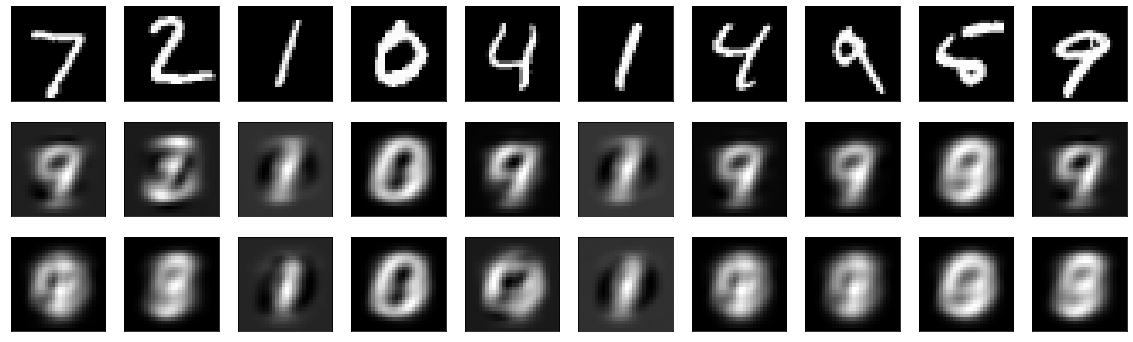

In [10]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(pca_decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(3, n, i + 1 + 2*n)
    decoded_imgs = decoder.predict(encoded_imgs)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [11]:
pal = sns.color_palette("Set3", len(set(y_test)))
y2col = { y:c for y,c in zip(set(y_test), pal)}

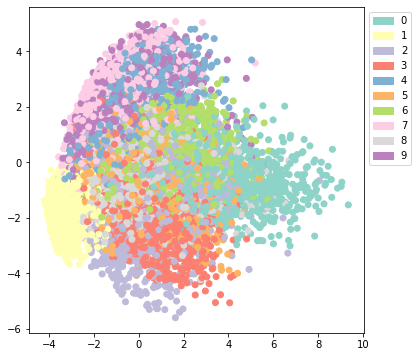

In [12]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(pca_encoded_imgs[:,0], pca_encoded_imgs[:,1], c=[y2col[y] for y in y_test])
ax.legend(handles=[mpatches.Patch(color=c, label=y) for y,c in y2col.items()], bbox_to_anchor=(1,1))

# Autoencoder

In [13]:
input_img = Input(shape=(784,))
encoded = Dense(256, activation='relu')(input_img)
encoded = Dense(2, activation='relu')(encoded)

decoded = Dense(256, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

deco = autoencoder.layers[-2](encoded_input)
deco = autoencoder.layers[-1](deco)
# create the decoder model
decoder = Model(encoded_input, deco)

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

W1013 12:03:52.785670 140735847728000 deprecation.py:323] From /anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [14]:
%%time
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder/deep-autoencoder-2dims')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.3457 - val_loss: 0.2676
Epoch 2/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.2652 - val_loss: 0.2628
Epoch 3/100
60000/60000 [==============================] - 2s 37us/step - loss: 0.2577 - val_loss: 0.2495
Epoch 4/100
60000/60000 [==============================] - 2s 37us/step - loss: 0.2466 - val_loss: 0.2436
Epoch 5/100
60000/60000 [==============================] - 2s 37us/step - loss: 0.2425 - val_loss: 0.2403
Epoch 6/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.2396 - val_loss: 0.2376
Epoch 7/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.2373 - val_loss: 0.2356
Epoch 8/100
60000/60000 [==============================] - 3s 42us/step - loss: 0.2354 - val_loss: 0.2337
Epoch 9/100
60000/60000 [==============================] - 2s 41us/step - loss: 0.2338 - val_loss: 0.2

In [15]:
%%time
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

CPU times: user 489 ms, sys: 76.5 ms, total: 565 ms
Wall time: 285 ms


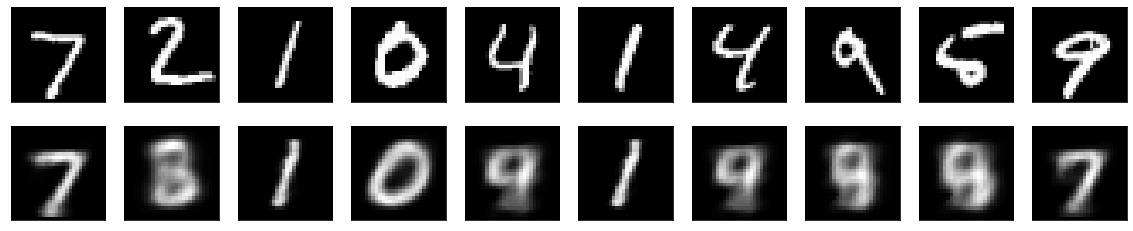

In [16]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

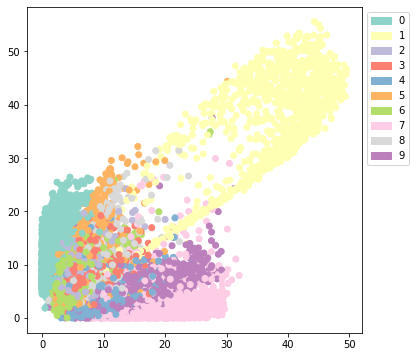

In [17]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(encoded_imgs[:,0], encoded_imgs[:,1], c=[y2col[y] for y in y_test])
ax.legend(handles=[mpatches.Patch(color=c, label=y) for y,c in y2col.items()], bbox_to_anchor=(1,1))

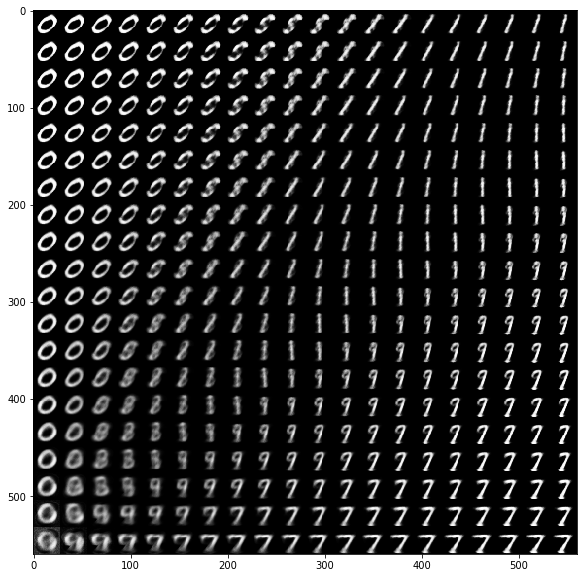

In [18]:
# display a 2D manifold of the digits
n = 20  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# linearly spaced coordinates on the unit square were transformed through the inverse CDF (ppf) of the Gaussian
# to produce values of the latent variables z, since the prior of the latent space is Gaussian
# grid_x = stats.norm.ppf(np.linspace(0.05, 0.95, n))
# grid_y = stats.norm.ppf(np.linspace(0.05, 0.95, n))
grid_x = np.linspace(0,50,n)
grid_y = np.linspace(0,50,n)

# predicteds = decoder.predict(np.vstack([grid_x, grid_y]).T)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        x_decoded = decoder.predict(np.array([[xi, yi]]))
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[(n-1-i) * digit_size: (n-i) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, origin='upper')



# Variational Autoencoder


In [59]:
batch_size = 256
original_dim = 784
latent_dim = 2
intermediate_dim = 256
epochs = 20
epsilon_std = 1.0


x = Input(shape=(original_dim,))
h = Dense(intermediate_dim, activation='relu')(x)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

In [60]:
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0.,
                              stddev=epsilon_std)
    return z_mean + K.exp(z_log_var / 2) * epsilon

# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

In [61]:
# we instantiate these layers separately so as to reuse them later
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

# instantiate VAE model
vae = Model(x, x_decoded_mean)

In [62]:
# Compute VAE loss
xent_loss = original_dim * metrics.binary_crossentropy(x, x_decoded_mean)
kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
beta = .1
vae_loss = K.mean(xent_loss + beta*kl_loss)

vae.add_loss(vae_loss)
vae.compile(optimizer='rmsprop')
vae.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           (None, 784)          0                                            
__________________________________________________________________________________________________
dense_27 (Dense)                (None, 256)          200960      input_13[0][0]                   
__________________________________________________________________________________________________
dense_28 (Dense)                (None, 2)            514         dense_27[0][0]                   
__________________________________________________________________________________________________
dense_29 (Dense)                (None, 2)            514         dense_27[0][0]                   
__________________________________________________________________________________________________
lambda_5 (

In [63]:
encoder = Model(x, z_mean)

# build a digit generator that can sample from the learned distribution
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
generator = Model(decoder_input, _x_decoded_mean)

In [64]:
%%time
vae.fit(x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, None),
        callbacks=[TensorBoard(log_dir='/tmp/autoencoder/vae')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 28us/step - loss: 197.6746 - val_loss: 173.7433
Epoch 2/20
60000/60000 [==============================] - 1s 24us/step - loss: 170.1833 - val_loss: 166.0510
Epoch 3/20
60000/60000 [==============================] - 1s 24us/step - loss: 164.8351 - val_loss: 162.3501
Epoch 4/20
60000/60000 [==============================] - 1s 24us/step - loss: 161.6626 - val_loss: 160.0269
Epoch 5/20
60000/60000 [==============================] - 1s 24us/step - loss: 159.4178 - val_loss: 159.2331
Epoch 6/20
60000/60000 [==============================] - 1s 24us/step - loss: 157.6189 - val_loss: 157.0291
Epoch 7/20
60000/60000 [==============================] - 1s 24us/step - loss: 156.1608 - val_loss: 155.7207
Epoch 8/20
60000/60000 [==============================] - 1s 24us/step - loss: 154.9903 - val_loss: 154.9065
Epoch 9/20
60000/60000 [==============================] - 1s 25us/step - loss:

In [65]:
%%time
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = generator.predict(encoded_imgs)

CPU times: user 651 ms, sys: 73.9 ms, total: 725 ms
Wall time: 451 ms


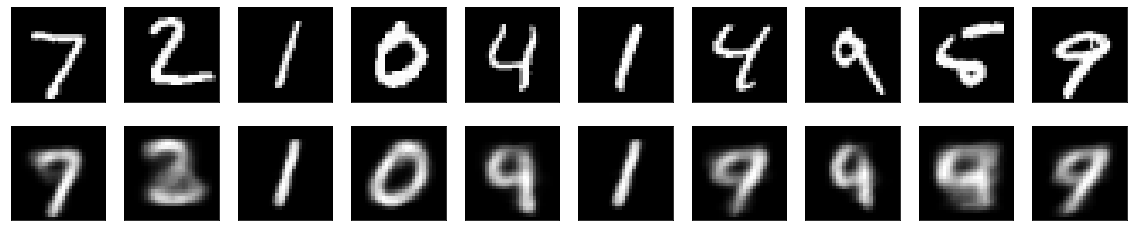

In [66]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

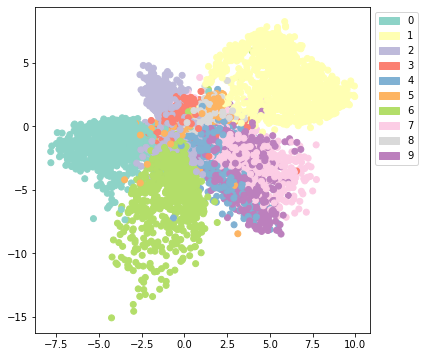

In [67]:
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(x_test_encoded[:,0], x_test_encoded[:,1], c=[y2col[y] for y in y_test])
ax.legend(handles=[mpatches.Patch(color=c, label=y) for y,c in y2col.items()], bbox_to_anchor=(1,1))

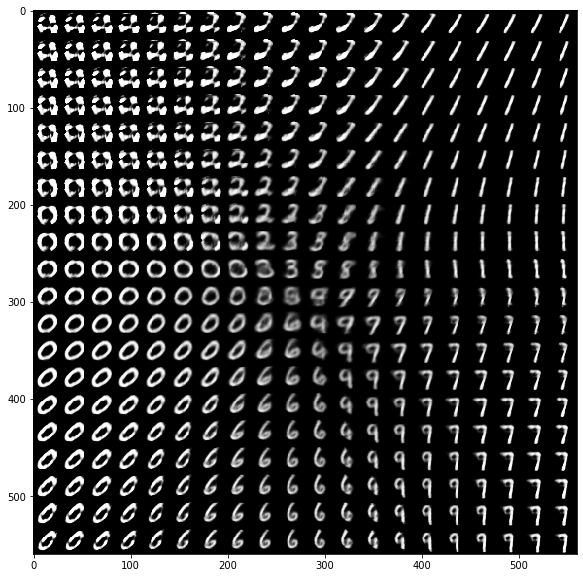

In [68]:
# display a 2D manifold of the digits
n = 20  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# linearly spaced coordinates on the unit square were transformed through the inverse CDF (ppf) of the Gaussian
# to produce values of the latent variables z, since the prior of the latent space is Gaussian
# grid_x = stats.norm.ppf(np.linspace(0.05, 0.95, n))
# grid_y = stats.norm.ppf(np.linspace(0.05, 0.95, n))
grid_x = np.linspace(-10,10,n)
grid_y = np.linspace(-10,10,n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = generator.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[(n-1-i) * digit_size: (n-i) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, origin='upper')
